# US Car Prices

## Sanjay Subramanian

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,7)

df = pd.read_csv("/Users/sanjay/Desktop/CarsDataAnalysis/USA_cars_datasets.csv")


In [2]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
df.shape

(2499, 13)

In [4]:
df.groupby("model")["model"].agg("count")

model
1500      39
2500       8
2500hd     1
300        6
3500       4
          ..
wagon     30
x3         2
xd         1
xt5        1
xterra     1
Name: model, Length: 127, dtype: int64

# Remove unnecessary columns

In [5]:
df1 = df.drop(["vin", "lot", "Unnamed: 0"], axis = "columns")

In [6]:
df1.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa,22 hours left


In [7]:
df1.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
condition       0
dtype: int64

In [8]:
df1.title_status.unique()

array(['clean vehicle', 'salvage insurance'], dtype=object)

In [9]:
len(df1.state.unique())

44

In [10]:
df1.country.unique()

array([' usa', ' canada'], dtype=object)

In [11]:
df1.year.unique()

array([2008, 2011, 2018, 2014, 2010, 2017, 2009, 2013, 2015, 2020, 2016,
       1973, 2003, 2019, 2002, 2000, 2001, 2005, 2012, 2006, 2007, 1998,
       2004, 1994, 1997, 1996, 1999, 1984, 1995, 1993])

# Data Analysis

Analyzing the data will help us find the various variables that are viable for our machine learning model and which will give us an accurate output

In [12]:
df1.groupby("brand")["brand"].agg("count")
    

brand
acura                 3
audi                  4
bmw                  17
buick                13
cadillac             10
chevrolet           297
chrysler             18
dodge               432
ford               1235
gmc                  42
harley-davidson       1
heartland             5
honda                12
hyundai              15
infiniti             12
jaguar                1
jeep                 30
kia                  13
land                  4
lexus                 2
lincoln               2
maserati              1
mazda                 2
mercedes-benz        10
nissan              312
peterbilt             4
ram                   1
toyota                1
Name: brand, dtype: int64

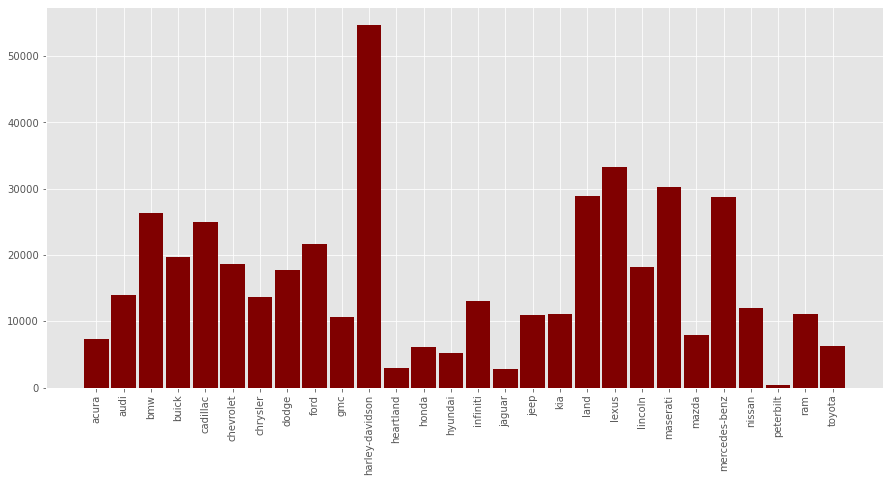

In [13]:
subset_columns = df1.loc[:, ['brand', 'price']]
#subset_columns
mean_price_car = subset_columns.groupby("brand")["price"].mean().reset_index()
#mean_price_car
plt.bar(mean_price_car["brand"], mean_price_car["price"], color = "maroon", width = 0.9)
plt.xticks(rotation=90, fontsize = 'medium')
plt.show()

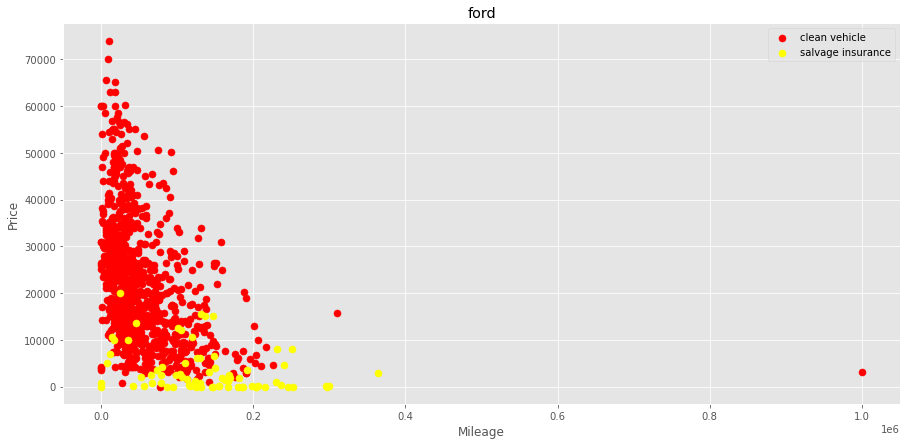

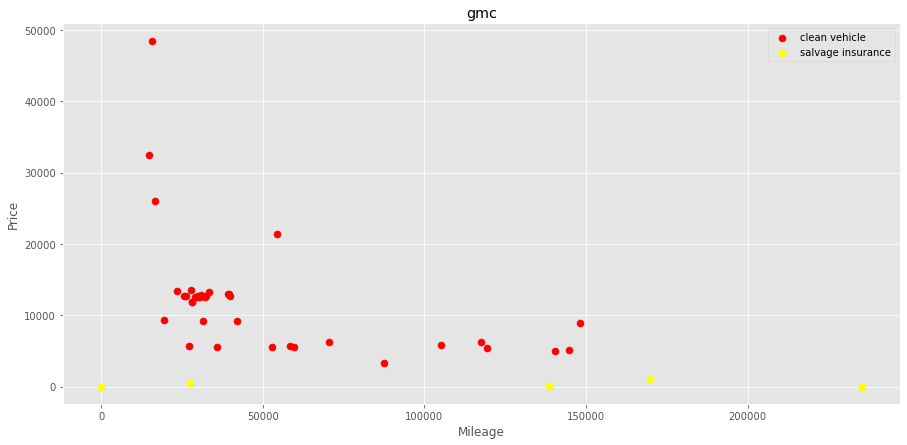

In [72]:
def scatter_plot(df, brand):
    clean_vehicle = df[(df.brand == brand) & (df.title_status == "clean vehicle")]
    salvage_insurance = df[(df.brand == brand) & (df.title_status == "salvage insurance")]
    plt.scatter(clean_vehicle["mileage"], clean_vehicle["price"], color = "red", label = "clean vehicle", s = 50)
    plt.scatter(salvage_insurance["mileage"], salvage_insurance["price"], color = "yellow", label = "salvage insurance", s = 50)
    plt.xlabel("Mileage")
    plt.ylabel("Price")
    plt.title(brand)
    plt.legend()
    plt.show()
 

scatter_plot(df1, "ford")
scatter_plot(df1, "gmc")
    

## Correlation Plot 

Finding a relation between the price of a car and mileage

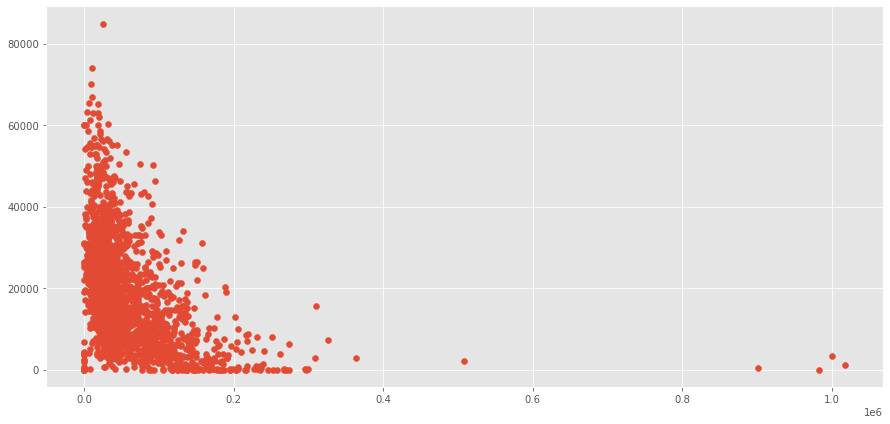

In [15]:
plt.scatter(df1.mileage, df1.price)
plt.show()

# Frequency Plots 

Function to plot the frequency of a brand and its models

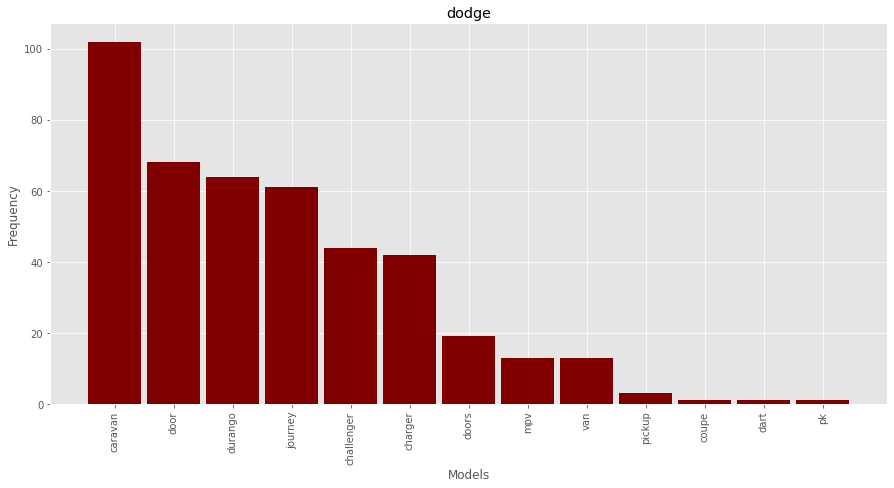

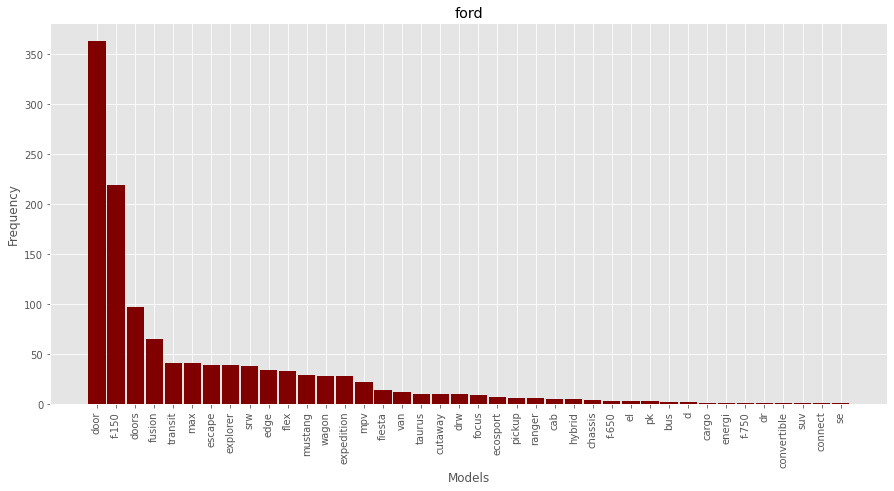

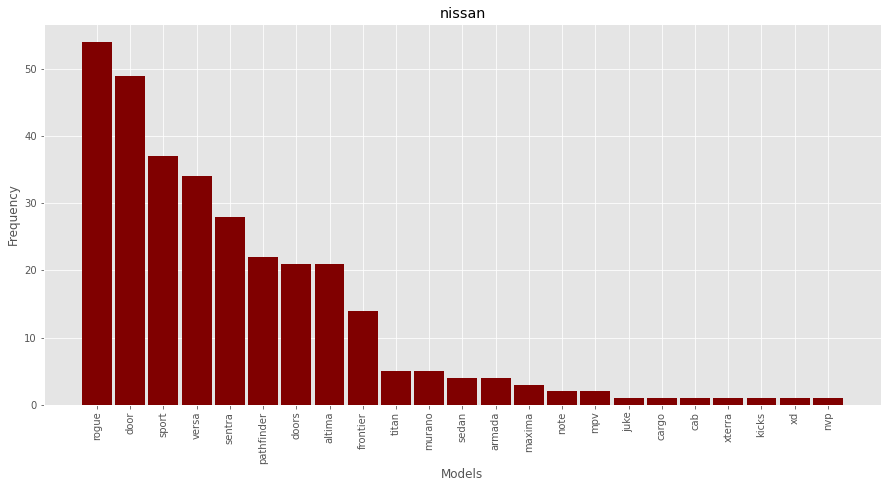

In [16]:
def freq_plotting(df, brand):
    subset_columns = df.loc[:, ["brand", "model"]]
    new = subset_columns[subset_columns["brand"] == brand]
    new1 = new["model"].value_counts()
    new1 = pd.DataFrame({'model': new1.index, 'count': new1.values})
    plt.bar(new1["model"], new1["count"], color = "maroon", width = 0.9)
    plt.xticks(rotation = 90, fontsize = "medium")
    plt.title(brand)
    plt.xlabel("Models")
    plt.ylabel("Frequency")
    plt.show()
    
freq_plotting(df1, "dodge")
freq_plotting(df1, "ford")
freq_plotting(df1, "nissan")

    

## Removing Outliers

Removing outliers help enhance our model and gives us a more accurate predictor 

In [21]:
nissan = df1[(df1.brand == "nissan") & (df1.model == "versa")]
nissan.price.describe()

count      34.000000
mean     8438.235294
std       912.543799
min      5900.000000
25%      7850.000000
50%      8650.000000
75%      9200.000000
max      9900.000000
Name: price, dtype: float64

In [24]:
df1[(df1.brand == "dodge") & (df1.model == "caravan") & (df1.price == 9000)]

,price,brand,model,year,title_status,mileage,color,state,country,condition
978,9000,dodge,caravan,2017,clean vehicle,81992,silver,florida,usa,4 days left


In [26]:
df2 = df1.drop(978)
df2

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609,red,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553,silver,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594,silver,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557,black,florida,usa,2 days left


In [28]:
df2[df2.price == 84900]

,price,brand,model,year,title_status,mileage,color,state,country,condition
502,84900,mercedes-benz,sl-class,2017,clean vehicle,25302,silver,florida,usa,2 days left


# One Hot Encoding

We are going to be one hot encoding some of the text columns so the model can interpret them when they are turned into numbers

In [47]:
df3 = df2.drop(["condition", "model", "country", "title_status", "state"], axis = "columns")

In [48]:
df3.head()

,price,brand,year,mileage,color
0,6300,toyota,2008,274117,black
1,2899,ford,2011,190552,silver
2,5350,dodge,2018,39590,silver
3,25000,ford,2014,64146,blue
4,27700,chevrolet,2018,6654,red


In [49]:
dummies = pd.get_dummies(df3.color)
dummies

,beige,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,brown,burgundy,cayenne red,charcoal,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2497,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df4 = pd.concat([df3, dummies.drop("yellow", axis = "columns")], axis = "columns")
df4

,price,brand,year,mileage,color,beige,billet silver metallic clearcoat,black,black clearcoat,blue,...,shadow black,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic
0,6300,toyota,2008,274117,black,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,ford,2011,190552,silver,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5350,dodge,2018,39590,silver,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,25000,ford,2014,64146,blue,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,27700,chevrolet,2018,6654,red,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,2019,23609,red,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,9200,nissan,2018,34553,silver,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2496,9200,nissan,2018,31594,silver,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2497,9200,nissan,2018,32557,black,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df5 = df4.drop("color", axis = "columns")
df5

,price,brand,year,mileage,beige,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,...,shadow black,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic
0,6300,toyota,2008,274117,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,ford,2011,190552,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5350,dodge,2018,39590,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,25000,ford,2014,64146,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,chevrolet,2018,6654,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,2019,23609,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,9200,nissan,2018,34553,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2496,9200,nissan,2018,31594,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2497,9200,nissan,2018,32557,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
dummies1 = pd.get_dummies(df5.brand)
dummies1

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,gmc,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
df6 = pd.concat([df5, dummies1.drop("toyota", axis = "columns")], axis = "columns")
df6

,price,brand,year,mileage,beige,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,...,kia,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram
0,6300,toyota,2008,274117,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,ford,2011,190552,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5350,dodge,2018,39590,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,ford,2014,64146,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,chevrolet,2018,6654,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,2019,23609,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2495,9200,nissan,2018,34553,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2496,9200,nissan,2018,31594,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2497,9200,nissan,2018,32557,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
df7 = df6.drop("brand", axis = "columns")
df7

,price,year,mileage,beige,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,brown,...,kia,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram
0,6300,2008,274117,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,190552,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5350,2018,39590,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,2014,64146,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,6654,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2495,9200,2018,34553,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2496,9200,2018,31594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2497,9200,2018,32557,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
x = df7.drop("price", axis = "columns")
x

,year,mileage,beige,billet silver metallic clearcoat,black,black clearcoat,blue,bright white clearcoat,brown,burgundy,...,kia,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram
0,2008,274117,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,190552,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,39590,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,64146,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,6654,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2019,23609,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2495,2018,34553,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2496,2018,31594,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2497,2018,32557,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
y = df7.price
y

0        6300
1        2899
2        5350
3       25000
4       27700
        ...  
2494     7800
2495     9200
2496     9200
2497     9200
2498     9200
Name: price, Length: 2498, dtype: int64

# Model Building

Once the one hot encoding is done now its time to build the model

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

# Linear Regression Model

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3293579569391478

# Decision Tree Model

In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
tree_model.score(x_test, y_test)

-0.12688808807498897

# Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)
forest_model.score(x_test, y_test)

0.3207540884411415

From these tree models we can see that the Linear Regression model is the most accurate

# Predicting the price of the car

In [71]:
forest_model.predict(x_test)

array([26106.12,   404.75, 14939.6 , 16430.  , 28148.92,  7522.5 ,
       21322.45, 13807.1 , 26545.06, 24835.7 , 10271.9 , 29854.88,
       13159.92, 20844.  , 14078.8 ,  3295.95, 23573.12, 28222.67,
       20279.  , 19512.  , 30956.25,  9938.  , 12923.5 , 17600.  ,
       29177.69, 13959.23, 23083.23, 43300.07, 20171.7 ,  4276.35,
       17422.03, 18844.19, 25312.8 , 16017.75, 19111.77,  9718.03,
       22885.43,  2809.2 , 12301.5 ,  9198.7 ,  8217.5 ,  3604.4 ,
       28100.26,  8258.  , 30110.1 , 11193.51, 20665.57,  4120.1 ,
       33735.7 , 20935.92, 19755.63,  7131.93, 19777.  , 13815.1 ,
       25700.02, 15404.  ,  7841.85, 15855.02, 19940.65, 23100.4 ,
       29173.8 , 16375.39,  5336.45, 27216.5 , 12106.84, 12178.39,
       19092.  , 14943.37, 26736.94,  8863.  , 20627.54, 15659.6 ,
       13741.64, 27552.89, 18570.  , 18001.43, 23827.6 , 23107.88,
       25681.85, 23298.2 , 15311.1 , 36556.42, 26871.54, 20588.  ,
       11850.95, 21106.4 , 20966.2 , 36842.11,  9541.7 , 18043